# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
import warnings



In [ ]:
# Identify what key drivers/factors (fields) that are causing price of used car to raise and drop based on what customers have bought
## import, mine, and cleanse data that is currently available under vehicles.csv
## dimensionality reduction and clustering for identifying patterns
## idenifty possible trends (year/mfg) that may impact price

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:

# Collect Initial Data - Initial Data Collection Report
# import data and review fields
df = pd.read_csv('data/vehicles.csv')

In [3]:
# Describe Data - Data Description Report
df.describe ()

,id,price,year,odometer
count,3.113480e+05,3.113480e+05,310323.000000,3.082360e+05
mean,7.311610e+09,7.187999e+04,2011.187244,9.781998e+04
std,4.473835e+06,1.066416e+07,9.503914,2.194792e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308281e+09,5.975000e+03,2008.000000,3.733300e+04
50%,7.312900e+09,1.390000e+04,2013.000000,8.531250e+04
75%,7.315291e+09,2.599000e+04,2017.000000,1.333602e+05
max,7.317059e+09,3.024942e+09,2022.000000,1.000000e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311348 entries, 0 to 311347
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            311348 non-null  int64  
 1   region        311348 non-null  object 
 2   price         311348 non-null  int64  
 3   year          310323 non-null  float64
 4   manufacturer  298117 non-null  object 
 5   model         307574 non-null  object 
 6   condition     190110 non-null  object 
 7   cylinders     181438 non-null  object 
 8   fuel          309387 non-null  object 
 9   odometer      308236 non-null  float64
 10  title_status  305391 non-null  object 
 11  transmission  309596 non-null  object 
 12  VIN           191469 non-null  object 
 13  drive         213149 non-null  object 
 14  size          89340 non-null   object 
 15  type          242180 non-null  object 
 16  paint_color   217677 non-null  object 
 17  state         311347 non-null  object 
dtypes: f

In [5]:
# Explore Data - Data Exploration Report
# review data and check row counts at 426880 across 18 columns
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311343,7315102265,bend,0,2007.0,ram,3500 quad cab laramie,NaN,NaN,diesel,135113.0,clean,automatic,3D7MX38AX7G808086,4wd,NaN,truck,NaN,or
311344,7315101442,bend,0,2001.0,ram,2500 quad cab long be,NaN,NaN,diesel,0.0,clean,manual,3B7KF237X1G788357,4wd,NaN,truck,NaN,or
311345,7315100589,bend,0,2006.0,honda,ridgeline rtl pickup 4d 5,NaN,NaN,gas,126944.0,clean,automatic,2HJYK16556H544399,4wd,NaN,truck,NaN,or
311346,7315100525,bend,0,2012.0,gmc,sierra 1500 crew cab sle pi,NaN,NaN,gas,118001.0,clean,automatic,3GTP2VE76CG149864,4wd,NaN,truck,NaN,or


In [6]:
# Verify Data Quality - Data Quality Report

# identify all columns with null values
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", null_columns)
print()

# count null values
# see that there are quite a few columns that are missing more than 30% of values with one missing more than 50%
null_counts = df.isnull().sum()
print(null_counts)
print()

# check for duplicate rows
print(df.duplicated().sum())



Columns with null values: ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

id                   0
region               0
price                0
year              1025
manufacturer     13231
model             3774
condition       121238
cylinders       129910
fuel              1961
odometer          3112
title_status      5957
transmission      1752
VIN             119879
drive            98199
size            222008
type             69168
paint_color      93671
state                1
dtype: int64

0


In [7]:
# too many values non-numeric. will remove from table.
print("Region:", (df["region"].nunique()))
print("year:", (df["year"].nunique()))
print("manufacturer:", (df["manufacturer"].nunique()))
print("model:", (df["model"].nunique()))
print("condition:", (df["condition"].nunique()))
print("cylinders:", (df["cylinders"].nunique()))
print("fuel:", (df["fuel"].nunique()))
print("odometer:", (df["odometer"].nunique()))
print("title_status:", (df["title_status"].nunique()))
print("transmission:", (df["transmission"].nunique()))
print("VIN:", (df["VIN"].nunique()))
print("drive:", (df["drive"].nunique()))
print("type:", (df["type"].nunique()))
print("paint_color:", (df["paint_color"].nunique()))
print("state:", (df["state"].nunique()))

Region: 302
year: 110
manufacturer: 42
model: 23809
condition: 6
cylinders: 8
fuel: 5
odometer: 85340
title_status: 6
transmission: 4
VIN: 88932
drive: 3
type: 13
paint_color: 12
state: 42


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [8]:
# removed 'size' column as it has more than 50% NaN
# removed 'region', 'model', 'state', 'VIN', 'manufacturer' as it has too many non numeric unique values
# format the year from float to int to remove decimal place.
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN', 'id'], axis=1)
df_cleaned["year"]=df_cleaned["year"].fillna(0).apply(np.int64)
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311348 entries, 0 to 311347
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         311348 non-null  int64  
 1   year          311348 non-null  int64  
 2   manufacturer  298117 non-null  object 
 3   condition     190110 non-null  object 
 4   cylinders     181438 non-null  object 
 5   fuel          309387 non-null  object 
 6   odometer      308236 non-null  float64
 7   title_status  305391 non-null  object 
 8   transmission  309596 non-null  object 
 9   drive         213149 non-null  object 
 10  type          242180 non-null  object 
 11  paint_color   217677 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 28.5+ MB


Text(0, 0.5, 'Odometer')

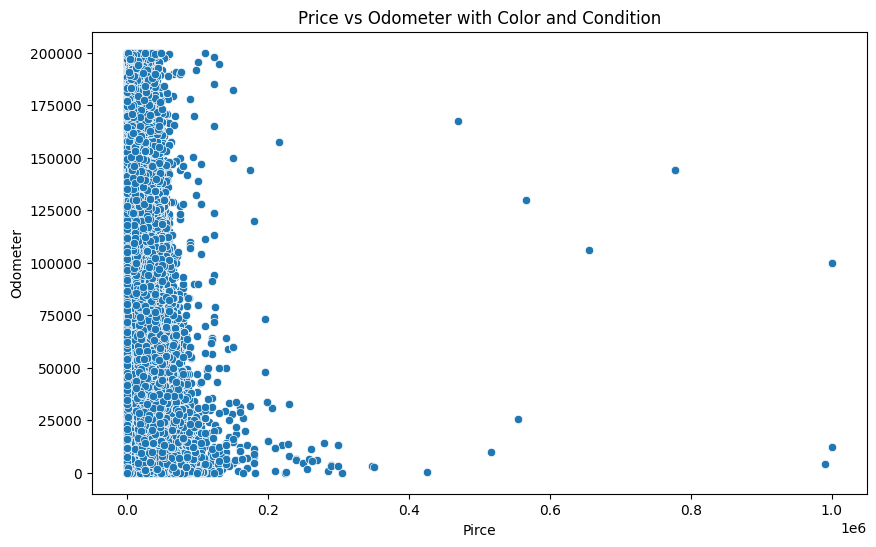

In [9]:
# removed the outliers keeping only those 500k and under
# as expected price and odometer are higher colorated as seen on the scatter plot. higher the price, lower the milaage
df_cleaned=df_cleaned.query("price <= 1000000")
df_cleaned=df_cleaned.query("odometer <= 200000")
df_cleaned=df_cleaned.query("year >= 1990")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="price", y ="odometer")

# Customize the plot
plt.title("Price vs Odometer with Color and Condition")
plt.xlabel("Pirce")
plt.ylabel("Odometer")



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [10]:
# coefficients is less than .05 inidicates year having a impact in predicting prices. highly corrlated as seen in scatter plot previously. one goes up the other goes down.
# Define your features (X) and target variable (y)
X = df_cleaned[['price']]
y = df_cleaned['odometer']

# Create a linear regression model
car_features_model = LinearRegression()

# Fit model
car_features_model.fit(X, y)
coefficients = car_features_model.coef_
print(coefficients)
print()

corrcoef = (np.corrcoef(df_cleaned.price, df_cleaned.odometer))
print (corrcoef)

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



[-1.44360389]

[[ 1.         -0.43211504]
 [-0.43211504  1.        ]]
                            OLS Regression Results                            
Dep. Variable:               odometer   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                 6.472e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:00:06   Log-Likelihood:            -3.4410e+06
No. Observations:              281877   AIC:                         6.882e+06
Df Residuals:                  281875   BIC:                         6.882e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

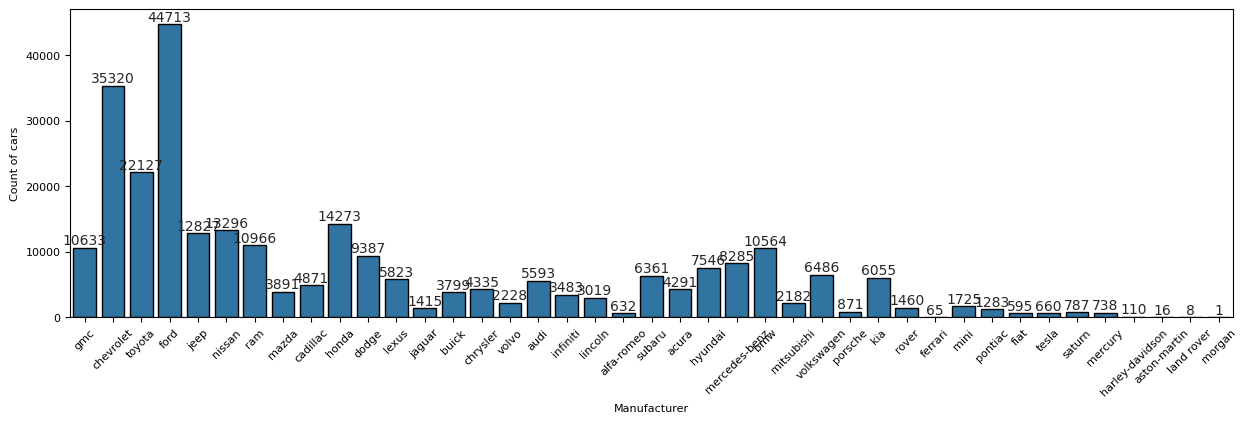

In [11]:
# based on graph. it appears that higher end cars are not the high seller. more of the low to mid brands that are driving sales as expected.
plt.figure(figsize = (15, 4))
ax=sns.countplot(data=df_cleaned, x=df_cleaned.manufacturer, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Manufacturer', size=8)
plt.xticks(size=8)
plt.xticks(rotation=45)
plt.show()
pd.reset_option('display.max_columns', 0)

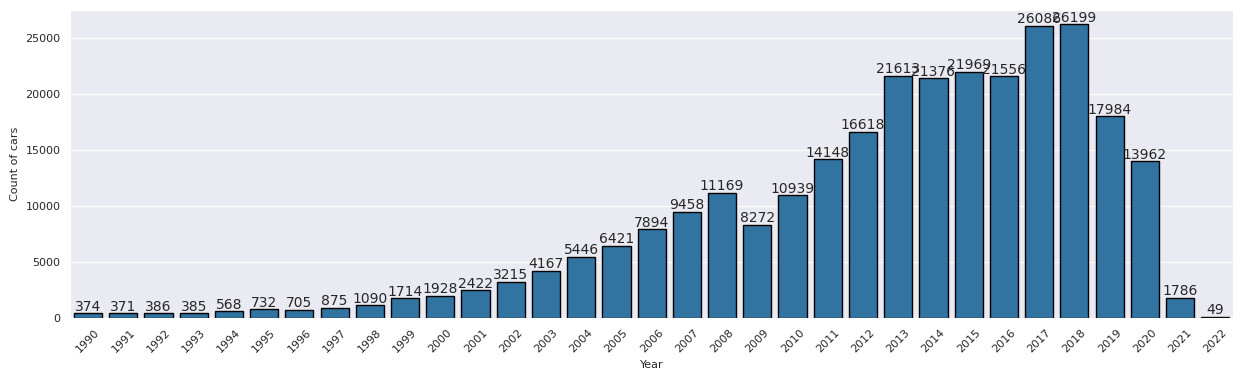

In [12]:
# based on graph. it appears that new cars are better sellers.
plt.figure(figsize = (15, 4))
ax=sns.countplot(data=df_cleaned, x=df_cleaned.year, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Year', size=8)
plt.xticks(size=8)
plt.xticks(rotation=45)
plt.show()
pd.reset_option('display.max_columns', 0)

4252.788336988118 $


array([[ 1.        , -0.53482856],
       [-0.53482856,  1.        ]])

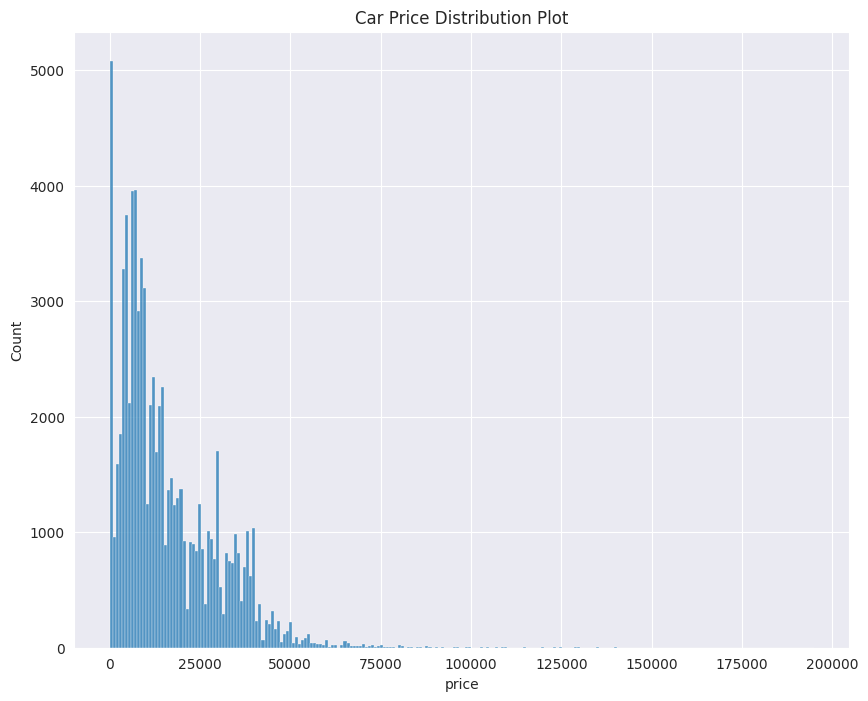

In [13]:
# difference between the mean and the median of $3200, which they are close in price sicne prices ranges can range widely up to $1M
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id'], axis=1)
df_cleaned=df_cleaned.query("price <= 1000000")
df_cleaned=df_cleaned.query("odometer <= 200000")
df_cleaned=df_cleaned.query("year >= 1990")
df_cleaned.dropna(inplace=True)

price_mean_median = df_cleaned.price.mean() - df_cleaned.price.median()
print (price_mean_median,"$")

plt.figure(figsize=(10,8))
#plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df_cleaned.price)
sns.set_style('darkgrid')

np.corrcoef(df_cleaned.odometer, df_cleaned.price)


In [14]:
# Linear Regression Model
# remove manufactuer as we it doesn't provide any more value than we already expect.
# drive and transmission appears to have the highest positive coeff. which has a positive corrlation impact on the price.
# fuel and title has the strongest negative coorlation out of the factors we are looking at.

pd.reset_option('display.max_columns', 0)
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id', 'manufacturer'], axis=1)
df_cleaned["year"]=df_cleaned["year"].fillna(0).apply(np.int64)
df_cleaned = df_cleaned[['year','condition','cylinders','fuel','transmission','drive','paint_color','type', 'title_status','price']]

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_cleaned[['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type','title_status']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status']))
df_cleaned = pd.concat([df_cleaned.drop(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status'], axis=1), encoded_df], axis=1)

# Model Building
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']
model = LinearRegression()
model.fit(X, y)
result = model.score(X, y)
print('Score:', result)

# Coefficient Interpretation
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
pd.set_option('display.max_rows', None)
print(coefficients)

Score: 0.00199673417136903
                     feature   coefficient
0                     year_0 -6.238698e+16
1                  year_1900 -6.238698e+16
2                  year_1901 -6.238698e+16
3                  year_1902 -6.238698e+16
4                  year_1903 -6.238698e+16
5                  year_1905 -6.238698e+16
6                  year_1913 -6.238698e+16
7                  year_1915 -6.238698e+16
8                  year_1916 -6.238698e+16
9                  year_1918 -6.238698e+16
10                 year_1921 -6.238698e+16
11                 year_1922 -6.238698e+16
12                 year_1923 -6.238698e+16
13                 year_1924 -6.238698e+16
14                 year_1925 -6.238698e+16
15                 year_1926 -6.238698e+16
16                 year_1927 -6.238698e+16
17                 year_1928 -6.238698e+16
18                 year_1929 -6.238698e+16
19                 year_1930 -6.238698e+16
20                 year_1931 -6.238698e+16
21                 year_193

In [15]:
# liner regression score is set at 1
# appears to be a perfect fit due to removing the null and rows with outliers. and testing against itself.
# doesn't really provide much value if it's already exact. not sure if it's correct.

pd.reset_option('display.max_columns', 0)
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id', 'manufacturer'], axis=1)
df_cleaned["year"]=df_cleaned["year"].fillna(0).apply(np.int64)
df_cleaned = df_cleaned[['year','condition','cylinders','fuel','transmission','drive','paint_color','type', 'title_status','price']]

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_cleaned[['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type','title_status']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status']))
df_cleaned = pd.concat([df_cleaned.drop(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status'], axis=1), encoded_df], axis=1)
df_cleaned.dropna(inplace=True)

X = df_cleaned
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print('Score:', result)

Score: 1.0


In [16]:
# cross validation
model_new = LinearRegression()
kfold_validation = KFold(7, shuffle=True, random_state=0)
results = cross_val_score (model_new, X, y, cv=kfold_validation)
print ('Results=', results)
print ('Mean=' ,np.mean(results))

Results= [1. 1. 1. 1. 1. 1. 1.]
Mean= 1.0


In [17]:
print ("Initial model:")
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Initial model:
Intercept: 1.4551915228366852e-11
Coefficients: [ 1.00000000e+00 -2.21116759e-11 -2.36316745e-10 -3.08085643e-10
 -1.81359349e-22  2.09366012e-10 -2.59496545e-11 -2.15247905e-22
  4.35179631e-11 -3.28650049e-11 -1.43070069e-10  2.17255086e-10
 -3.86386682e-11  1.60584135e-10  2.57739012e-10  8.02888452e-11
 -8.66503474e-11  3.36845333e-11  6.58414225e-11 -4.21951667e-11
 -1.09535838e-11  1.36871478e-10  2.60785174e-12 -9.92737964e-12
  5.41800937e-12 -1.44127851e-10 -1.01272747e-10  6.93773687e-11
 -1.63687532e-10 -1.69710417e-11  1.69945189e-10  6.46039340e-11
  1.22548239e-11  8.82918369e-24  1.01574511e-10  3.63339524e-11
  7.64717599e-12  1.45018442e-11  2.25336625e-11  2.98532076e-11
  2.67260394e-11  2.14575710e-11  6.68342199e-12  1.89818716e-11
  1.40297880e-11  9.28962016e-12  5.42168287e-12 -3.11769242e-12
  7.80064761e-12 -3.94856781e-10  1.17263028e-11  1.41954020e-11
  1.64768359e-11  8.13188092e-12 -8.03926109e-11  8.07627460e-12
  1.09413249e-11  5.1429148

In [18]:
# error score is very little as expected due to linear regression = 1
y_pred = model.predict(X_test)
print ("Initial model metrics:")
print ("Initial model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Initial model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Initial model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Initial model metrics:
Initial model MAE: 2.764240000785729e-11
Initial model MSE: 2.7488596493848897e-21
Initial model RMSE: 5.2429568464606777e-11


In [19]:
# Polynomial Regression Model
# highest coorlation is the fuel_gas
# fuel has the highest correlation.

df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id', 'manufacturer'], axis=1)
df_cleaned=df_cleaned.query("price <= 1000000")
df_cleaned=df_cleaned.query("odometer <= 200000")
df_cleaned=df_cleaned.query("year >= 1990")


encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_cleaned[['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type','title_status']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status']))
df_cleaned = pd.concat([df_cleaned.drop(['year','condition', 'cylinders','fuel','transmission','drive','paint_color','type', 'title_status'], axis=1), encoded_df], axis=1)
df_cleaned.dropna(inplace=True)

X = df_cleaned
y = df_cleaned['price']

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')
highest_corr = df_cleaned.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
highest_corr



Baseline for training data: 257884676.4681078
Baseline for testing data: 259965512.67626014


'fuel_nan'

In [36]:
# score for all three means got lower but at it's pracitally 0.
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print('Score:', result)
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))



Score: 1.0
MAE: 6.1647130170401585e-12
MSE: 6.116450604293478e-23
RMSE: 7.820774005361283e-12


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# appears that both models I ran the data through shows a score of 1. seems unlikely that were to happen.
# but both models show that outside of year (later years), odometer(low miles), make (low to mid brand), the fuel type of car is the more deseriable.
# may want to just look at more indiviual factors as oppose to the one i selected also keep the noise. i think i narrorwed down the data too much to not take into account any noise. so everything that is tested always falls with score of 1.
# plots shows trending for certain fields that does drive sales and price which leads to customer sales.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# Factors that drive sales and what customers want are what we exoect, but there seems to be a coorlation between at fuel type with diesel driving price high.
# Manufacturs of lower to mid range along with new cars is what is driving sales of cars.
# trending shows that price of 150k is roughly the cutoff to not have cars sitting on the lot for cars in general but while keeping a few on hand for those who want to spend more.
# to keep inventory at the right level Inventory should be slotted with later year models with the older models not as deserible#

Text(0, 0.5, 'Year')

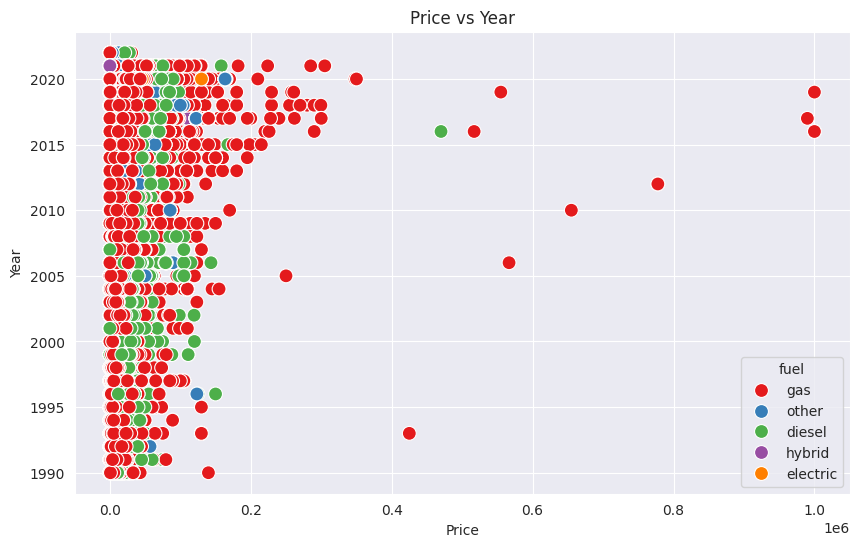

In [24]:
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id', 'manufacturer'], axis=1)
df_cleaned=df_cleaned.query("price <= 1000000")
df_cleaned=df_cleaned.query("odometer <= 200000")
df_cleaned=df_cleaned.query("year >= 1990")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="price", y ="year", hue='fuel', s=100, palette='Set1')

# Customize the plot
plt.title("Price vs Year")
plt.xlabel("Price")
plt.ylabel("Year")



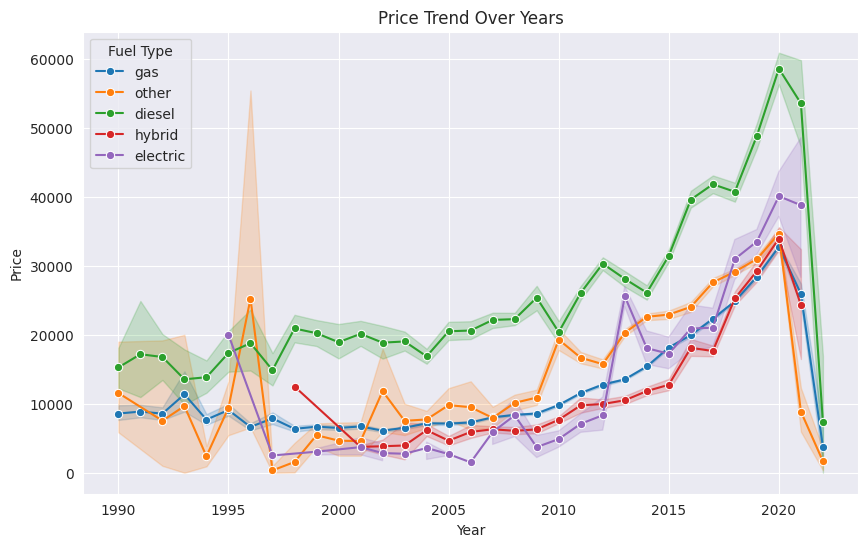

In [29]:
df_cleaned = df.drop(['size','region', 'model', 'state', 'VIN','id', 'manufacturer'], axis=1)
df_cleaned=df_cleaned.query("price <= 1000000")
df_cleaned=df_cleaned.query("odometer <= 200000")
df_cleaned=df_cleaned.query("year >= 1990")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='price', hue='fuel', marker='o')

# Customize the plot
plt.title("Price Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title='Fuel Type')

# Show the plot
plt.show()